<a href="https://colab.research.google.com/github/ramirezzzluisss/pythonprojects/blob/main/HonorsThesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Honors Thesis Data Analysis
## Utah DOPL Contractor Credit Qualtrics Survey

In [164]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [165]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [166]:
# connect to csv data file

from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/UtahContractorSurvey_202304052139.csv')

Mounted at /content/gdrive


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              2186 non-null   object
 1   EndDate                2186 non-null   object
 2   Status                 2186 non-null   object
 3   IPAddress              2178 non-null   object
 4   Progress               2186 non-null   object
 5   Duration (in seconds)  2186 non-null   object
 6   Finished               2186 non-null   object
 7   RecordedDate           2186 non-null   object
 8   ResponseId             2186 non-null   object
 9   RecipientLastName      2 non-null      object
 10  RecipientFirstName     2 non-null      object
 11  RecipientEmail         2 non-null      object
 12  ExternalReference      2 non-null      object
 13  LocationLatitude       1728 non-null   object
 14  LocationLongitude      1728 non-null   object
 15  DistributionChannel  

In [168]:
df.head(15)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q21_8_TEXT,Q22,Q29
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Has your business been approved for a loan thr...,Has your business been approved for a business...,How would you rate your relationship with your...,Is your accountant or tax preparer a Certified...,How much revenue/sales did your business make ...,What is your business's total outstanding busi...,What is the top source of financing for your b...,What is the top source of financing for your b...,Which of the following Utah consulting service...,Enter your phone number if you are interested ...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID14""}","{""ImportId"":""QID15""}","{""ImportId"":""QID16""}","{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID20_8_TEXT""}","{""ImportId"":""QID21""}","{""ImportId"":""QID28_TEXT""}"
2,2023-02-13 15:10:50,2023-02-13 15:12:01,Survey Preview,NaN,100,70,True,2023-02-13 15:12:01,R_1lidpbGA9ypeT2L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-16 21:46:47,2023-02-16 21:50:44,Survey Preview,NaN,100,236,True,2023-02-16 21:50:45,R_1CHhLtsrT1hBKQ4,NaN,...,Approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-02-27 13:45:55,2023-02-27 13:48:28,Survey Preview,NaN,100,152,True,2023-02-27 13:48:29,R_2QYbxOXJxwk7sRc,NaN,...,Did not apply,Did not apply,No Relationship,I DO NOT know,$100k - $250k,$0,Local Bank or Credit Union,NaN,"Small Business Administration,Small Business D...",NaN
5,2023-02-27 14:43:19,2023-02-27 14:43:48,Survey Preview,NaN,100,29,True,2023-02-27 14:43:49,R_RrwxY3MgIlhiidP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2023-03-03 10:49:34,2023-03-03 10:51:27,Survey Preview,NaN,100,112,True,2023-03-03 10:51:28,R_pSEuN2bwWsxMxyN,NaN,...,Did not apply,Did not apply,No Relationship,No,$100k - $250k,$0,Personal and Family Savings,NaN,"Small Business Administration,Suazo Business C...",NaN
7,2023-03-03 10:51:33,2023-03-03 10:51:47,Survey Preview,NaN,100,13,True,2023-03-03 10:51:49,R_2AXXEMMkIVqtM7g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2023-03-03 11:00:24,2023-03-03 11:03:34,IP Address,107.3.87.173,100,190,True,2023-03-03 11:03:34,R_3iJeQAfkldNjMcV,NaN,...,Did not apply,Approved,Excellent,Yes,More than $1M,$0,Other,Cash,Small Business Administration,NaN
9,2023-03-03 11:19:32,2023-03-03 11:23:22,IP Address,174.204.5.25,100,229,True,2023-03-03 11:23:22,R_25WUjfR7BFCSpxT,NaN,...,Did not apply,Did not apply,Excellent,Yes,$250k - $1M,$25k-$100k,Personal and Family Savings,NaN,"Small Business Administration,Women's Business...",NaN


In [169]:
# clean data
df.rename(columns = {'Q2':'LicenseClassification',
                     'Q3':'EntityType',
                     'Q4':'LatinxShareholders',
                     'Q5':'Age',
                     'Q6':'YearsofExperience',
                     'Q7':'ConstructionFocus',
                     'Q8':'LEED',
                     'Q9':'BusinessPlan',
                     'Q10':'EINApplication',
                     'Q11':'NumOfEmployees',
                     'Q12':'LatinxEmployeesPercent',
                     'Q13':'WorkAccidents',
                     'Q14':'SBALoan',
                     'Q15':'PPPLoan',
                     'Q16':'BankCreditUnionLoan',
                     'Q17':'LoanOfficerRelationship',
                     'Q18':'AccountantCPA',
                     'Q19':'Revenue2022',
                     'Q20':'TotalOutstandingDebt',
                     'Q21':'TopFinancingSource',
                     'Q22':'ConsultingServices',
                     'Q23':'RaceAndEthnicity',
                     'Q24':'Gender',
                     'Q25':'Education',
                     'Q26':'CreditScore',
                     'Q27':'HomeOwner',
                     'Q28':'EnglishLanguage',
                     'Q29':'PhoneNumber',
                     }, inplace = True)

# delete first 8 rows
df_clean = df.iloc[8:]

# drop null rows
df_clean = df_clean.dropna(axis=0, subset=['EnglishLanguage'])

# change race
# df_clean['RaceAndEthnicity'].replace('Hispanic or Latino/a/x', 'Latinx')
# df_clean['RaceAndEthnicity'].replace('Black or African American', 'Black')
# df_clean['RaceAndEthnicity'].replace('Native Hawaiian or Pacific Islander', 'Pacific Islander')
# df_clean['RaceAndEthnicity'].replace('American Indian or Alaskan Native', 'Native American')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1724 entries, 8 to 2185
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   StartDate                1724 non-null   object
 1   EndDate                  1724 non-null   object
 2   Status                   1724 non-null   object
 3   IPAddress                1723 non-null   object
 4   Progress                 1724 non-null   object
 5   Duration (in seconds)    1724 non-null   object
 6   Finished                 1724 non-null   object
 7   RecordedDate             1724 non-null   object
 8   ResponseId               1724 non-null   object
 9   RecipientLastName        0 non-null      object
 10  RecipientFirstName       0 non-null      object
 11  RecipientEmail           0 non-null      object
 12  ExternalReference        0 non-null      object
 13  LocationLatitude         1716 non-null   object
 14  LocationLongitude        1716 non-null  

In [170]:
df_clean.head(5)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,PPPLoan,BankCreditUnionLoan,LoanOfficerRelationship,AccountantCPA,Revenue2022,TotalOutstandingDebt,TopFinancingSource,Q21_8_TEXT,ConsultingServices,PhoneNumber
8,2023-03-03 11:00:24,2023-03-03 11:03:34,IP Address,107.3.87.173,100,190,True,2023-03-03 11:03:34,R_3iJeQAfkldNjMcV,NaN,...,Did not apply,Approved,Excellent,Yes,More than $1M,$0,Other,Cash,Small Business Administration,NaN
9,2023-03-03 11:19:32,2023-03-03 11:23:22,IP Address,174.204.5.25,100,229,True,2023-03-03 11:23:22,R_25WUjfR7BFCSpxT,NaN,...,Did not apply,Did not apply,Excellent,Yes,$250k - $1M,$25k-$100k,Personal and Family Savings,NaN,"Small Business Administration,Women's Business...",NaN
10,2023-03-03 11:20:13,2023-03-03 11:24:58,IP Address,73.127.32.5,100,284,True,2023-03-03 11:24:58,R_3nT79TKTyBgzdQf,NaN,...,Did not apply,Did not apply,Excellent,Yes,$250k - $1M,$0,Personal and Family Savings,NaN,"Small Business Administration,Small Business D...",NaN
11,2023-03-03 11:24:01,2023-03-03 11:27:40,IP Address,74.68.107.21,100,219,True,2023-03-03 11:27:41,R_3oMkMuBaB0VM7og,NaN,...,Approved,Did not apply,Excellent,No,More than $1M,$100k-$250k,Personal and Family Savings,NaN,Small Business Administration,NaN
12,2023-03-03 11:29:05,2023-03-03 11:31:45,IP Address,73.65.139.97,100,159,True,2023-03-03 11:31:45,R_1gA5HrPFMm9DM6N,NaN,...,Did not apply,Approved,Excellent,Yes,More than $1M,$25k-$100k,Business Credit Card,NaN,Small Business Administration,8018791018


In [171]:
# with hue percentages
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

In [172]:
df_clean['Revenue2022'].unique()
df_clean['Revenue2022'] = pd.Categorical(df_clean['Revenue2022'],
                                         categories = ['$0', '$25k or less', '$25k - $100k', '$100k - $250k', '$250k - $1M', 'More than $1M'],
                                         ordered = True)

<ipython-input-172-32c61b756fd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Revenue2022'] = pd.Categorical(df_clean['Revenue2022'],


Text(0.5, 1.0, 'Revenue and Race')

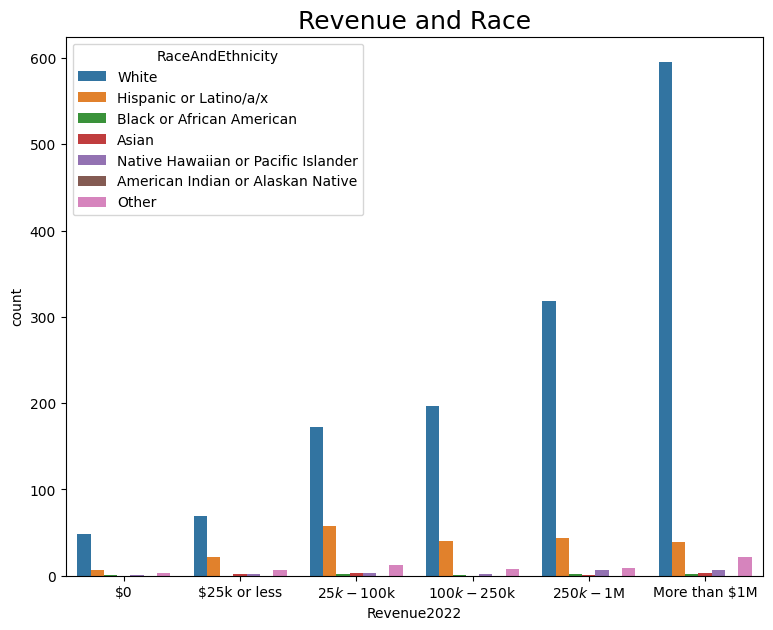

In [173]:
plt.figure(figsize=(9,7))
hue_order = ['White', 'Hispanic or Latino/a/x', 'Black or African American', 'Asian',
             'Native Hawaiian or Pacific Islander', 'American Indian or Alaskan Native',
             'Other']

ax = sns.countplot(x = 'Revenue2022', hue = 'RaceAndEthnicity', hue_order = hue_order, data = df_clean)
#Add title
plt.title('Revenue and Race', fontsize=18)

In [174]:
df_clean['BankCreditUnionLoan'] = pd.Categorical(df_clean['BankCreditUnionLoan'],
                                         categories = ['Approved', 'Did not apply', 'Denied', 'Do not qualify'],
                                         ordered = True)

Text(0.5, 1.0, 'Bank/Credit Union Loan and Race')

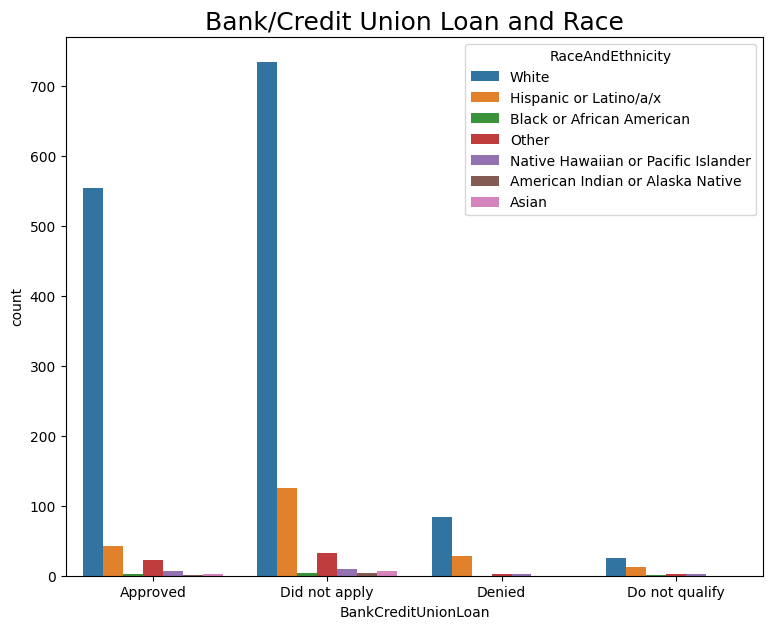

In [175]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'BankCreditUnionLoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('Bank/Credit Union Loan and Race', fontsize=18)

In [176]:
df_clean['SBALoan'] = pd.Categorical(df_clean['SBALoan'],
                                         categories = ['Approved', 'Did not apply', 'Denied', 'Do not qualify'],
                                         ordered = True)

Text(0.5, 1.0, 'SBA Loan and Race')

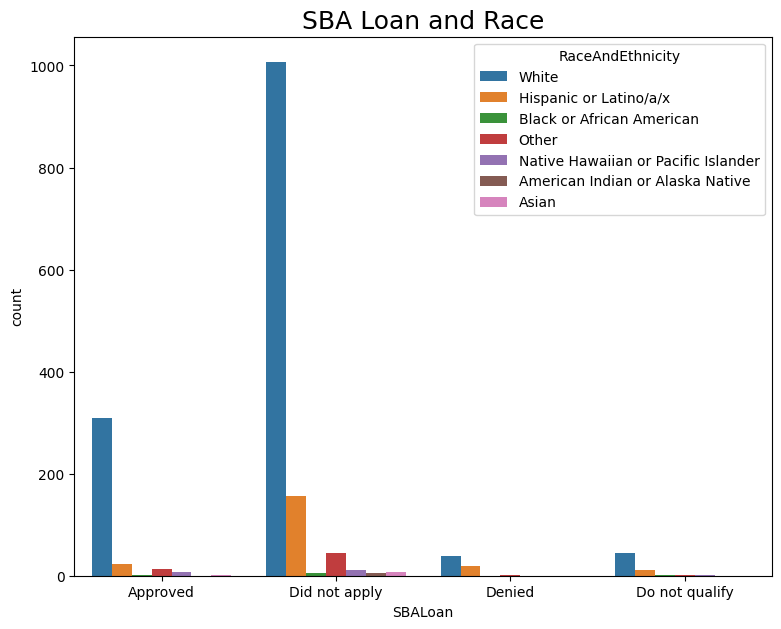

In [177]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'SBALoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('SBA Loan and Race', fontsize=18)

In [178]:
df_clean['PPPLoan'] = pd.Categorical(df_clean['PPPLoan'],
                                         categories = ['Approved', 'Did not apply', 'Denied', 'Do not qualify'],
                                         ordered = True)

Text(0.5, 1.0, 'PPP Loan and Race')

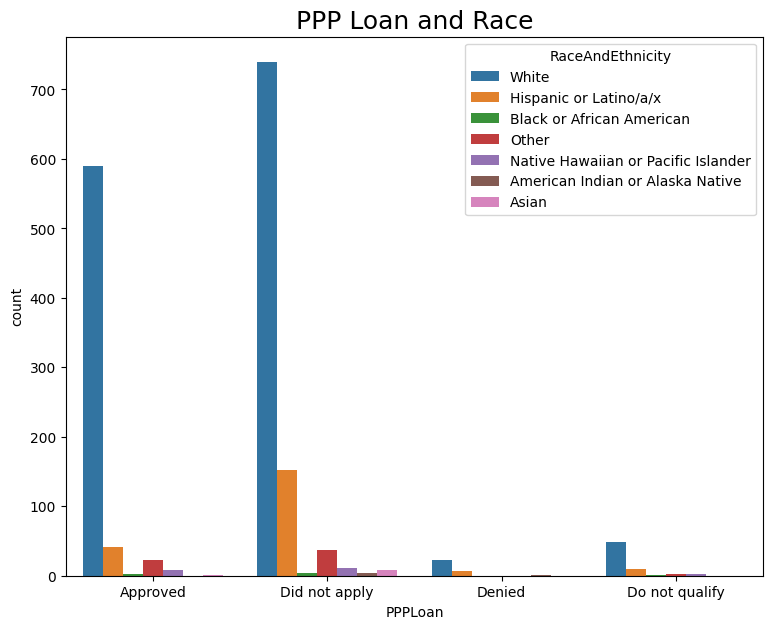

In [179]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'PPPLoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('PPP Loan and Race', fontsize=18)

In [180]:
df_clean['Education'] = pd.Categorical(df_clean['Education'],
                                         categories = ['Less than high school', 'High school graduate or GED', 'Some college',
                                                       'Associates degree', 'Bachelors degree', 'Masters degree', 'Doctorate'],
                                         ordered = True)

Text(0.5, 1.0, 'Education and Race')

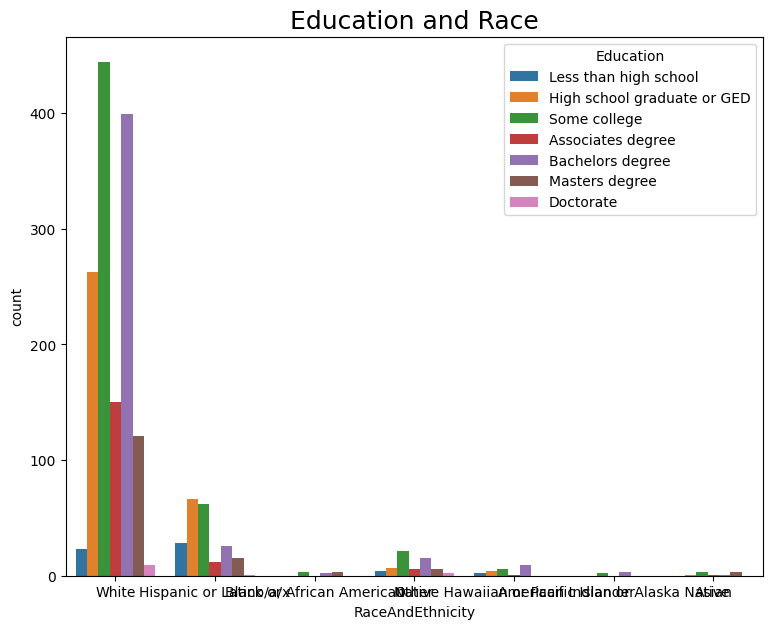

In [181]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'Education', data = df_clean)
#Add title
plt.title('Education and Race', fontsize=18)

Text(0.5, 1.0, 'Entity Type and Race')

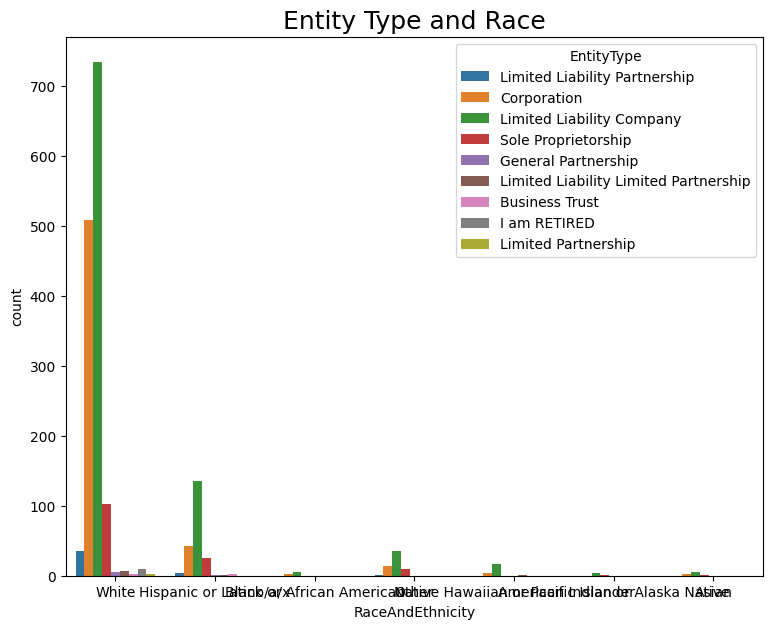

In [182]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'EntityType', data = df_clean)
#Add title
plt.title('Entity Type and Race', fontsize=18)

Text(0.5, 1.0, 'Business Plan and Race')

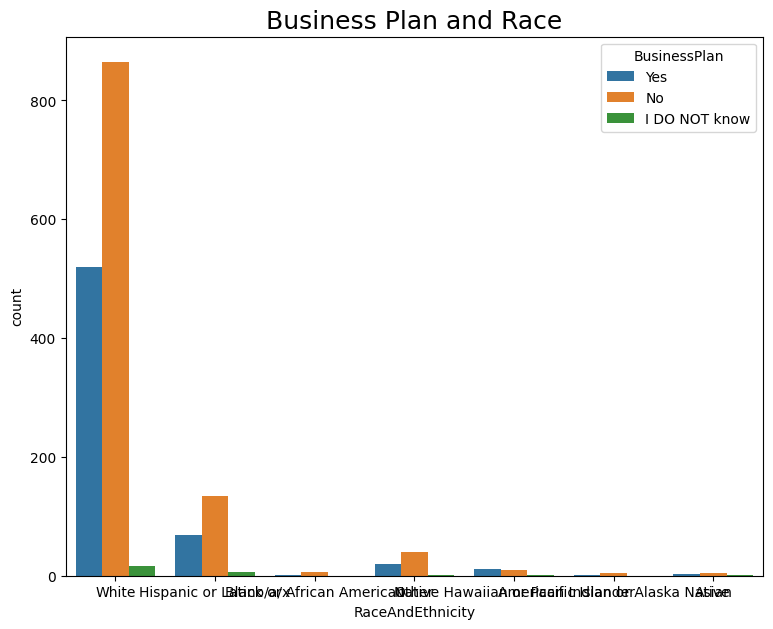

In [183]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'BusinessPlan', data = df_clean)
#Add title
plt.title('Business Plan and Race', fontsize=18)

Text(0.5, 1.0, 'LEED and Race')

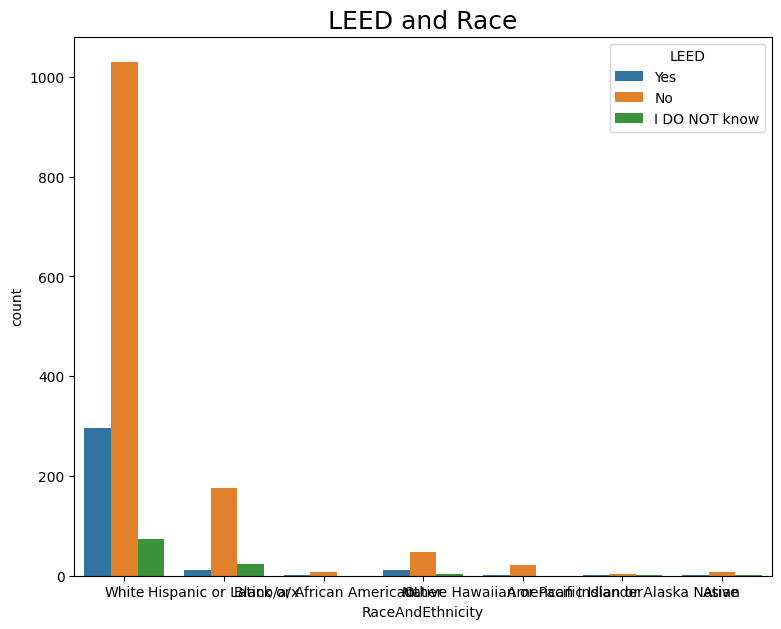

In [184]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'LEED', data = df_clean)
#Add title
plt.title('LEED and Race', fontsize=18)

Text(0.5, 1.0, 'EIN and Race')

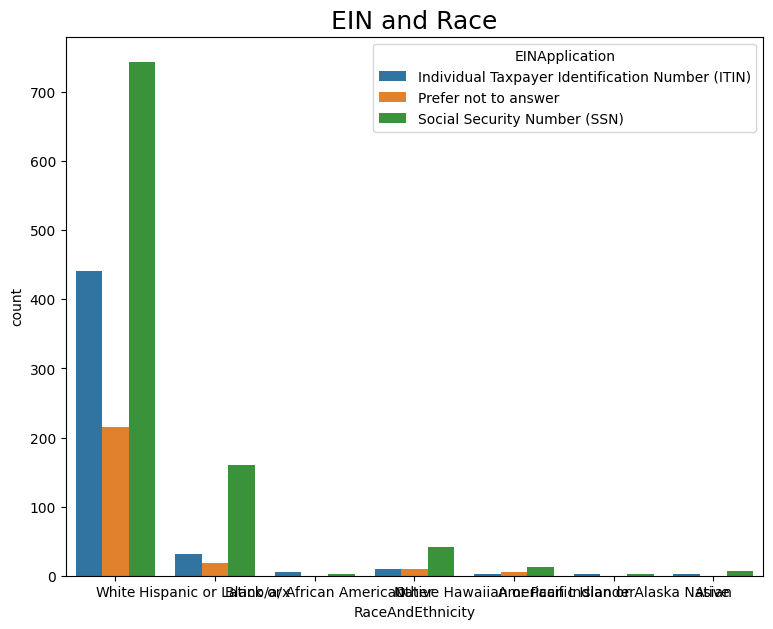

In [185]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'EINApplication', data = df_clean)
#Add title
plt.title('EIN and Race', fontsize=18)

Text(0.5, 1.0, 'Language and Race')

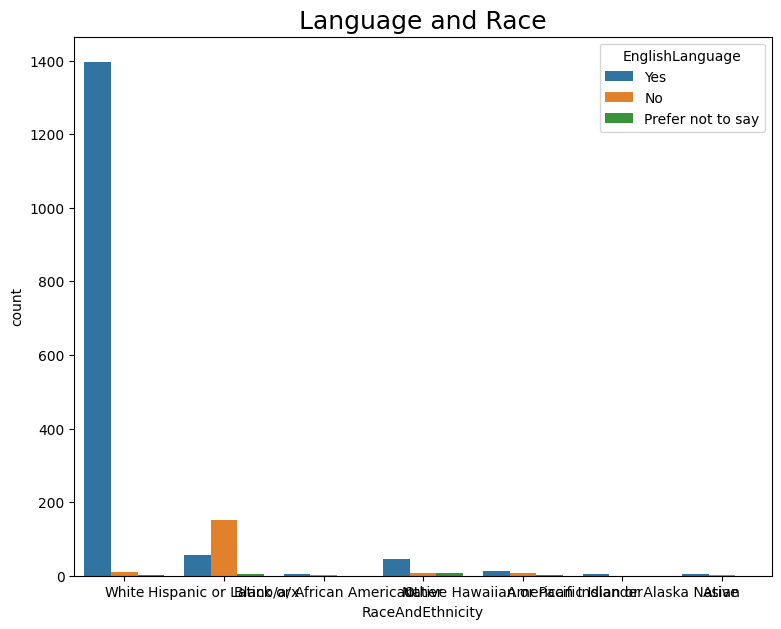

In [186]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'EnglishLanguage', data = df_clean)
#Add title
plt.title('Language and Race', fontsize=18)

Text(0.5, 1.0, 'Contractor Race')

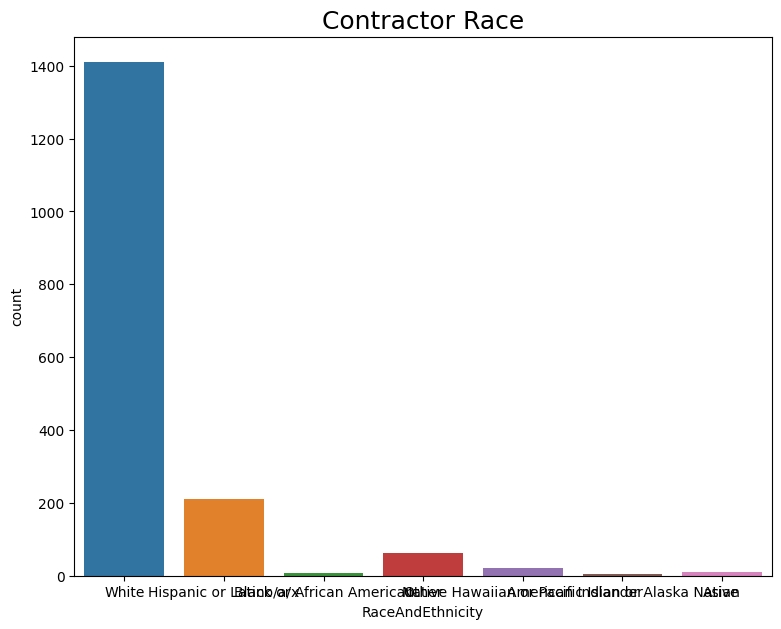

In [187]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('Contractor Race', fontsize=18)

# Regression Analyss

In [188]:
# create data frame for regression

df_reg = df_clean
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1724 entries, 8 to 2185
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   StartDate                1724 non-null   object  
 1   EndDate                  1724 non-null   object  
 2   Status                   1724 non-null   object  
 3   IPAddress                1723 non-null   object  
 4   Progress                 1724 non-null   object  
 5   Duration (in seconds)    1724 non-null   object  
 6   Finished                 1724 non-null   object  
 7   RecordedDate             1724 non-null   object  
 8   ResponseId               1724 non-null   object  
 9   RecipientLastName        0 non-null      object  
 10  RecipientFirstName       0 non-null      object  
 11  RecipientEmail           0 non-null      object  
 12  ExternalReference        0 non-null      object  
 13  LocationLatitude         1716 non-null   object  
 14  Location

In [189]:
# clean data
df_reg = df_reg.dropna(subset=['SBALoan'])
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 8 to 2185
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   StartDate                1714 non-null   object  
 1   EndDate                  1714 non-null   object  
 2   Status                   1714 non-null   object  
 3   IPAddress                1714 non-null   object  
 4   Progress                 1714 non-null   object  
 5   Duration (in seconds)    1714 non-null   object  
 6   Finished                 1714 non-null   object  
 7   RecordedDate             1714 non-null   object  
 8   ResponseId               1714 non-null   object  
 9   RecipientLastName        0 non-null      object  
 10  RecipientFirstName       0 non-null      object  
 11  RecipientEmail           0 non-null      object  
 12  ExternalReference        0 non-null      object  
 13  LocationLatitude         1706 non-null   object  
 14  Location

In [190]:
# drop columns of df
df_reg = df_reg.drop(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q23_7_TEXT', 'Q21_8_TEXT', 'PhoneNumber'], axis=1)

In [191]:
# change license classification categories to numerical
df_reg.loc[df_reg['LicenseClassification'] == 'B-100: General Building', 'LicenseClassification'] = "1" 
df_reg.loc[df_reg['LicenseClassification'] == 'R-100: Residential/Small Commercial', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'R-101: Residential/Small Commercial Non-Structural Remodel/Repair', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'E-100: General Engineering', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'E-200: General Electrical', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'P-200: General Plumbing Contractor', 'LicenseClassification'] = "1"

df_reg.loc[df_reg['LicenseClassification'] == 'R-200: Factory Built Housing', 'LicenseClassification'] = "0" 
df_reg.loc[df_reg['LicenseClassification'] == 'E-201: Residential Electrical', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'P-201: Residential Plumbing', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-202: Solar Photovoltaic', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-220: Carpentry & Flooring', 'LicenseClassification'] = "0"  
df_reg.loc[df_reg['LicenseClassification'] == 'S-230: Masonry, Siding, Stucco, Glass, and Rain Gutter', 'LicenseClassification'] = "0"  
df_reg.loc[df_reg['LicenseClassification'] == 'S-260: Asphalt & Concrete', 'LicenseClassification'] = "0"  
df_reg.loc[df_reg['LicenseClassification'] == 'S-270: Drywall, Paint, and Plastering', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-280: Roofing', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-310: Foundation, Excavation, and Demolition', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-330: Landscape & Recreation', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-350: HVAC', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-370: Fire Suppression Systems', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-410: Boiler, Pipelines, Waste Water, and Water Conditioner', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-440: Sign Installation', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-700: Limited Scope', 'LicenseClassification'] = "0"

df_reg['LicenseClassification'] = df_reg['LicenseClassification'].astype('int')

In [192]:
# change latinx shareholders > 50 percent
df_reg.loc[df_reg['LatinxShareholders'] == 'Yes', 'LatinxShareholders'] = "1"
df_reg.loc[df_reg['LatinxShareholders'] == 'No', 'LatinxShareholders'] = "0"
df_reg.loc[df_reg['LatinxShareholders'] == 'I DO NOT know', 'LatinxShareholders'] = "0"

df_reg['LatinxShareholders'] = df_reg['LatinxShareholders'].astype('int')

In [193]:
# change SBA Loan
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Approved','1')  
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Denied','0')
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Did not apply','0')
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Do not qualify','0')

#Convert to integer
df_reg['SBALoan'] = df_reg['SBALoan'].astype('int')


In [194]:
# change PPP Loan
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Approved','1')  
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Denied','0')
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Did not apply','0')
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Do not qualify','0')

#Convert to integer
df_reg['PPPLoan'] = df_reg['PPPLoan'].astype('int')

In [195]:
# change Bank Credit Union Loan
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Approved','1')  
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Denied','0')
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Did not apply','0')
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Do not qualify','0')

#Convert to integer
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].astype('int')

In [196]:
# change Accountant CPA
df_reg.loc[df_reg['AccountantCPA'] == 'Yes', 'AccountantCPA'] = "1"
df_reg.loc[df_reg['AccountantCPA'] == 'No', 'AccountantCPA'] = "0"
df_reg.loc[df_reg['AccountantCPA'] == 'I DO NOT know', 'AccountantCPA'] = "0"

# Convert to integer
df_reg['AccountantCPA'] = df_reg['AccountantCPA'].astype('int')

In [197]:
# change business plan
df_reg.loc[df_reg['BusinessPlan'] == 'Yes', 'BusinessPlan'] = "1"
df_reg.loc[df_reg['BusinessPlan'] == 'No', 'BusinessPlan'] = "0"
df_reg.loc[df_reg['BusinessPlan'] == 'I DO NOT know', 'BusinessPlan'] = "0"

# Convert to integer
df_reg['BusinessPlan'] = df_reg['BusinessPlan'].astype('int')

In [198]:
# change gender
df_reg.loc[df_reg['Gender'] == 'Male', 'Gender'] = "1"
df_reg.loc[df_reg['Gender'] == 'Female', 'Gender'] = "0"
df_reg.loc[df_reg['Gender'] == 'Non-binary / third gender', 'Gender'] = "0"
df_reg.loc[df_reg['Gender'] == 'Prefer not to say', 'Gender'] = "0"

# Convert to integer
df_reg['Gender'] = df_reg['Gender'].astype('int')


In [199]:
# change outstanding debt
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$0', 'TotalOutstandingDebt'] = "0"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$25k or less', 'TotalOutstandingDebt'] = "15"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$25k-$100k', 'TotalOutstandingDebt'] = "75"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$100k-$250k', 'TotalOutstandingDebt'] = "175"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$250k-$1M', 'TotalOutstandingDebt'] = "750"
df_reg.loc[df_reg['TotalOutstandingDebt'] == 'More than $1M', 'TotalOutstandingDebt'] = "1500"

# Convert to integer
df_reg['TotalOutstandingDebt'] = df_reg['TotalOutstandingDebt'].astype('int')

In [200]:
# change Revenue
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$0','0', regex=True)  
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$25k or less','15', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$25k \- \$100k','75', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$100k \- \$250k','175', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$250k \- \$1M','750', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('More than \$1M','1500', regex=True)

#Convert to integer
df_reg['Revenue2022'] = df_reg['Revenue2022'].astype('int')

In [201]:
# change homeowner
df_reg.loc[df_reg['HomeOwner'] == 'Yes', 'HomeOwner'] = "1"
df_reg.loc[df_reg['HomeOwner'] == 'No', 'HomeOwner'] = "0"
df_reg.loc[df_reg['HomeOwner'] == 'Prefer not to say', 'HomeOwner'] = "0"

# Convert to integer
df_reg['HomeOwner'] = df_reg['HomeOwner'].astype('int')

In [202]:
# change LEED
df_reg.loc[df_reg['LEED'] == 'Yes', 'LEED'] = "1"
df_reg.loc[df_reg['LEED'] == 'No', 'LEED'] = "0"
df_reg.loc[df_reg['LEED'] == 'I DO NOT know', 'LEED'] = "0"

# Convert to integer
df_reg['LEED'] = df_reg['LEED'].astype('int')

In [203]:
# change number of employees
df_reg.loc[df_reg['NumOfEmployees'] == '0 or Family', 'NumOfEmployees'] = "0"
df_reg.loc[df_reg['NumOfEmployees'] == 'Less than 5', 'NumOfEmployees'] = "5"
df_reg.loc[df_reg['NumOfEmployees'] == '5-10', 'NumOfEmployees'] = "10"
df_reg.loc[df_reg['NumOfEmployees'] == '11-20', 'NumOfEmployees'] = "15"
df_reg.loc[df_reg['NumOfEmployees'] == '20+', 'NumOfEmployees'] = "25"

# Convert to integer
df_reg['NumOfEmployees'] = df_reg['NumOfEmployees'].astype('int')

df_reg['NumOfEmployees'].unique()

array([ 5, 10, 15, 25,  0])

In [204]:
# change work accident
df_reg.loc[df_reg['WorkAccidents'] == 'None', 'WorkAccidents'] = "0"
df_reg.loc[df_reg['WorkAccidents'] == '20+', 'WorkAccidents'] = "25"

# Convert to integer
df_reg['WorkAccidents'] = df_reg['WorkAccidents'].astype('int')

In [205]:
# change years of work experience
df_reg.loc[df_reg['YearsofExperience'] == 'less than 1 year', 'YearsofExperience'] = "0"
df_reg.loc[df_reg['YearsofExperience'] == '60+', 'YearsofExperience'] = "60"

# Convert to integer
df_reg['YearsofExperience'] = df_reg['YearsofExperience'].astype('int')

In [206]:
#change english language
df_reg.loc[df_reg['EnglishLanguage'] == 'Yes', 'EnglishLanguage'] = "1"
df_reg.loc[df_reg['EnglishLanguage'] == 'No', 'EnglishLanguage'] = "0"
df_reg.loc[df_reg['EnglishLanguage'] == 'Prefer not to say', 'EnglishLanguage'] = "0"

# Convert to integer
df_reg['EnglishLanguage'] = df_reg['EnglishLanguage'].astype('int')

In [207]:
# change EIN
df_reg.loc[df_reg['EINApplication'] == 'Social Security Number (SSN)', 'EINApplication'] = "1"
df_reg.loc[df_reg['EINApplication'] == 'Individual Taxpayer Identification Number (ITIN)', 'EINApplication'] = "0"
df_reg.loc[df_reg['EINApplication'] == 'Prefer not to answer', 'EINApplication'] = "0"

# Convert to integer
df_reg['EINApplication'] = df_reg['EINApplication'].astype('int')

In [208]:
# change Latinx Employees Percent
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '0%', 'LatinxEmployeesPercent'] = "0"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == 'Less than 25%', 'LatinxEmployeesPercent'] = "1"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '25-50%', 'LatinxEmployeesPercent'] = "2"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '51-75%', 'LatinxEmployeesPercent'] = "3"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '76-100%', 'LatinxEmployeesPercent'] = "4"

# Convert to integer
df_reg['LatinxEmployeesPercent'] = df_reg['LatinxEmployeesPercent'].astype('int')

In [209]:
# change entity type
df_reg['LLC'] = df_reg['EntityType']
df_reg.loc[df_reg['LLC'] == 'Limited Liability Company', 'LLC'] = "1"
df_reg.loc[df_reg['LLC'] != 'Limited Liability Company', 'LLC'] = "0"

df_reg['SoleP'] = df_reg['EntityType']
df_reg.loc[df_reg['SoleP'] == 'Sole Proprietorship', 'SoleP'] = "1"
df_reg.loc[df_reg['SoleP'] != 'Sole Proprietorship', 'SoleP'] = "0"

df_reg['LP'] = df_reg['EntityType']
df_reg.loc[df_reg['LP'] == 'Limited Partnership', 'LP'] = "1"
df_reg.loc[df_reg['LP'] != 'Limited Partnership', 'LP'] = "0"

df_reg['LLP'] = df_reg['EntityType']
df_reg.loc[df_reg['LLP'] == 'Limited Liability Partnership', 'LLP'] = "1"
df_reg.loc[df_reg['LLP'] != 'Limited Liability Partnership', 'LLP'] = "0"

df_reg['LLLP'] = df_reg['EntityType']
df_reg.loc[df_reg['LLLP'] == 'Limited Liability Limited Partnership', 'LLLP'] = "1"
df_reg.loc[df_reg['LLLP'] != 'Limited Liability Limited Partnership', 'LLLP'] = "0"

df_reg['Corp'] = df_reg['EntityType']
df_reg.loc[df_reg['Corp'] == 'Corporation', 'Corp'] = "1"
df_reg.loc[df_reg['Corp'] != 'Corporation', 'Corp'] = "0"

df_reg['GenP'] = df_reg['EntityType']
df_reg.loc[df_reg['GenP'] == 'General Partnership', 'GenP'] = "1"
df_reg.loc[df_reg['GenP'] != 'General Partnership', 'GenP'] = "0"

df_reg['BTrust'] = df_reg['EntityType']
df_reg.loc[df_reg['BTrust'] == 'Business Trust', 'BTrust'] = "1"
df_reg.loc[df_reg['BTrust'] != 'Business Trust', 'BTrust'] = "0"

# Convert to integer
df_reg['LLC'] = df_reg['LLC'].astype('int')
df_reg['SoleP'] = df_reg['SoleP'].astype('int')
df_reg['LP'] = df_reg['LP'].astype('int')
df_reg['LLP'] = df_reg['LLP'].astype('int')
df_reg['LLLP'] = df_reg['LLLP'].astype('int')
df_reg['Corp'] = df_reg['Corp'].astype('int')
df_reg['GenP'] = df_reg['GenP'].astype('int')
df_reg['BTrust'] = df_reg['BTrust'].astype('int')

In [210]:
# change education
df_reg.loc[df_reg['Education'] == 'High school graduate or GED', 'HighSchool'] = "1"
df_reg.loc[df_reg['Education'] != 'High school graduate or GED', 'HighSchool'] = "0"

df_reg.loc[df_reg['Education'] == 'Some college', 'SomeCollege'] = "1"
df_reg.loc[df_reg['Education'] != 'Some college', 'SomeCollege'] = "0"

df_reg.loc[df_reg['Education'] == 'Associates degree', 'Associate'] = "1"
df_reg.loc[df_reg['Education'] != 'Associates degree', 'Associate'] = "0"

df_reg.loc[df_reg['Education'] == 'Bachelors degree', 'Bachelor'] = "1"
df_reg.loc[df_reg['Education'] != 'Bachelors degree', 'Bachelor'] = "0"

df_reg.loc[df_reg['Education'] == 'Masters degree', 'Master'] = "1"
df_reg.loc[df_reg['Education'] != 'Masters degree', 'Master'] = "0"

df_reg.loc[df_reg['Education'] == 'Doctorate', 'Doctorate'] = "1"
df_reg.loc[df_reg['Education'] != 'Doctorate', 'Doctorate'] = "0"

# convert to integer

df_reg['HighSchool'] = df_reg['HighSchool'].astype('int')
df_reg['SomeCollege'] = df_reg['SomeCollege'].astype('int')
df_reg['Associate'] = df_reg['Associate'].astype('int')
df_reg['Bachelor'] = df_reg['Bachelor'].astype('int')
df_reg['Master'] = df_reg['Master'].astype('int')
df_reg['Doctorate'] = df_reg['Doctorate'].astype('int')


In [211]:
# change race and ethnicity
df_reg.loc[df_reg['RaceAndEthnicity'] == 'White', 'White'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'White', 'White'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Hispanic or Latino/a/x', 'Latinx'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Hispanic or Latino/a/x', 'Latinx'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Black or African American', 'Black'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Black or African American', 'Black'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Native Hawaiian or Pacific Islander', 'PacificIslander'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Native Hawaiian or Pacific Islander', 'PacificIslander'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'American Indian or Alaska Native', 'NativeAmerican'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'American Indian or Alaska Native', 'NativeAmerican'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Asian', 'Asian'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Asian', 'Asian'] = "0"

# convert to integer
df_reg['White'] = df_reg['White'].astype('int')
df_reg['Latinx'] = df_reg['Latinx'].astype('int')
df_reg['Black'] = df_reg['Black'].astype('int')
df_reg['PacificIslander'] = df_reg['PacificIslander'].astype('int')
df_reg['NativeAmerican'] = df_reg['NativeAmerican'].astype('int')
df_reg['Asian'] = df_reg['Asian'].astype('int')

In [212]:
# change construction focus
df_reg.loc[df_reg['ConstructionFocus'] == 'Residential', 'Residential'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Residential', 'Residential'] = "0"

df_reg.loc[df_reg['ConstructionFocus'] == 'Commercial', 'Commercial'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Commercial', 'Commercial'] = "0"

df_reg.loc[df_reg['ConstructionFocus'] == 'Industrial', 'Industrial'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Industrial', 'Industrial'] = "0"

df_reg.loc[df_reg['ConstructionFocus'] == 'Infrastructure', 'Infrastructure'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Infrastructure', 'Infrastructure'] = "0"

# convert to integer
df_reg['Residential'] = df_reg['Residential'].astype('int')
df_reg['Commercial'] = df_reg['Commercial'].astype('int')
df_reg['Industrial'] = df_reg['Industrial'].astype('int')
df_reg['Infrastructure'] = df_reg['Infrastructure'].astype('int')

In [213]:
      #  'Age',
      #  'CreditScore',
      #  'LoanOfficerRelationship',
      #  'TopFinancingSource',
      #  'ConsultingServices'],

In [214]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 8 to 2185
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   LicenseClassification    1714 non-null   int64   
 1   EntityType               1714 non-null   object  
 2   LatinxShareholders       1714 non-null   int64   
 3   Age                      1714 non-null   object  
 4   RaceAndEthnicity         1714 non-null   object  
 5   Gender                   1714 non-null   int64   
 6   Education                1714 non-null   category
 7   CreditScore              1714 non-null   object  
 8   HomeOwner                1714 non-null   int64   
 9   EnglishLanguage          1714 non-null   int64   
 10  YearsofExperience        1714 non-null   int64   
 11  ConstructionFocus        1714 non-null   object  
 12  LEED                     1714 non-null   int64   
 13  BusinessPlan             1714 non-null   int64   
 14  EINAppli

In [215]:
df_reg.columns

Index(['LicenseClassification', 'EntityType', 'LatinxShareholders', 'Age',
       'RaceAndEthnicity', 'Gender', 'Education', 'CreditScore', 'HomeOwner',
       'EnglishLanguage', 'YearsofExperience', 'ConstructionFocus', 'LEED',
       'BusinessPlan', 'EINApplication', 'NumOfEmployees',
       'LatinxEmployeesPercent', 'WorkAccidents', 'SBALoan', 'PPPLoan',
       'BankCreditUnionLoan', 'LoanOfficerRelationship', 'AccountantCPA',
       'Revenue2022', 'TotalOutstandingDebt', 'TopFinancingSource',
       'ConsultingServices', 'LLC', 'SoleP', 'LP', 'LLP', 'LLLP', 'Corp',
       'GenP', 'BTrust', 'HighSchool', 'SomeCollege', 'Associate', 'Bachelor',
       'Master', 'Doctorate', 'White', 'Latinx', 'Black', 'PacificIslander',
       'NativeAmerican', 'Asian', 'Residential', 'Commercial', 'Industrial',
       'Infrastructure'],
      dtype='object')

In [219]:
# establish independent and dependent variables
x = df_reg[['LicenseClassification', 'LatinxShareholders', 'Gender', 'HomeOwner',
       'EnglishLanguage', 'YearsofExperience', 'LEED',
       'BusinessPlan', 'EINApplication', 'NumOfEmployees',
       'LatinxEmployeesPercent', 'WorkAccidents', 'SBALoan', 'PPPLoan',
       'BankCreditUnionLoan', 'AccountantCPA',
       'TotalOutstandingDebt', 'LLC', 'SoleP', 'LP', 'LLP', 'LLLP', 'Corp',
       'GenP', 'BTrust', 'HighSchool', 'SomeCollege', 'Associate', 'Bachelor',
       'Master', 'Doctorate', 'White', 'Latinx', 'Black', 'PacificIslander',
       'NativeAmerican', 'Asian', 'Residential', 'Commercial', 'Industrial',
       'Infrastructure']]

# omit
# 'EntityType',  'Education', 'ConstructionFocus', 'RaceAndEthnicity',

# not yet converted to integer
# 'Age', 'CreditScore',  'LoanOfficerRelationship', 'TopFinancingSource', 'ConsultingServices',

y = df_reg['Revenue2022']




In [225]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Revenue2022   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     72.53
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          6.75e-259
Time:                        03:58:34   Log-Likelihood:                -12794.
No. Observations:                1714   AIC:                         2.564e+04
Df Residuals:                    1686   BIC:                         2.580e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -117